# **Visual Information Processing Lab**

# MNIST vs MLP

#### Mounting

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
import os
os.chdir('/content/drive/My Drive/DL_2019_20/DL_Practicals/Results/MLP_MNIST')

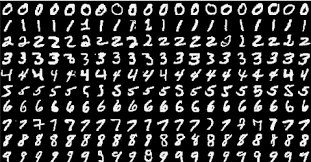

In [0]:
from IPython.display import Image, display
display(Image(filename='/content/drive/My Drive/DL_2019_20/Files/1a.png', embed=True))

#### Imports

In [0]:
import keras
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Data Fetching and Visualizattion

In [0]:
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()
xtest1 = np.copy(xtrain)
ytest1 = np.copy(ytest)

In [0]:
print(ytest1[10])
print(xtest1[0])

In [0]:
plt.subplot(221).imshow(xtest[0],cmap='hot')
plt.subplot(222).imshow(xtest[1],cmap='gray')
plt.subplot(223).imshow(xtest[2],cmap='viridis')
plt.subplot(224).imshow(xtest[3],cmap='Reds')

In [0]:
print(ytest[0])
print(ytest[1])
print(ytest[2])
print(ytest[3])

In [0]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

In [0]:
print(type(xtrain))
print(xtrain.ndim)
print(xtrain.dtype)

In [0]:
print(xtrain.shape[0])
print(xtrain.shape[1])
print(xtrain.shape[2])
print(ytrain.shape[0])

#### Data Pre Processing
* Normalization
* One Hot Encoding

In [0]:
xtrain = xtrain.astype('float32')
xtest  = xtest.astype('float32')

In [0]:
#keras.utils.normalize(a, axis=-1, order=2)
print (np.max(xtrain),np.max(xtest))
print (np.min(xtrain),np.min(xtest))

print (np.max(ytrain),np.max(ytest))
print (np.min(ytrain),np.min(ytest))

mean = np.mean(xtrain)
std = np.std(xtrain)

print(mean)
print(std)

xtrain -= mean
xtrain /= std

xtest -= mean
xtest /= std

print (np.max(xtrain),np.max(xtest))
print (np.min(xtrain),np.min(xtest))

In [0]:
print(xtrain[0])

In [0]:
xtrain = xtrain.reshape(xtrain.shape[0],784)
xtest  = xtest.reshape(xtest.shape[0],784)
print(xtrain.shape)
print(xtest.shape)

In [0]:
from keras.utils import to_categorical
ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)

print(ytrain.shape)
print(ytest.shape)

In [0]:
i=100
print(ytrain[i])
print(np.argmax(ytrain[i]))

#### MLP Model
* Model building
* Compiling
* Training

In [0]:
import keras
from keras import models
from keras import layers

In [0]:
model = models.Sequential()
model.add(layers.Dense(10,input_shape = (784,), activation='softmax'))
model.summary()

In [0]:
keras.utils.plot_model(model, to_file='model.png', show_shapes=False, show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96)

In [0]:
os.chdir('/content/drive/My Drive/DL_2019_20/DL_Practicals/Results/MLP_MNIST')
print(os.getcwd())
from keras.callbacks import EarlyStopping,ModelCheckpoint
mc = ModelCheckpoint('MLP_Mnist_MLP.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)
filepath = "saved-model-{epoch:02d}.h5"
mc1 = ModelCheckpoint(filepath, monitor='val_loss', mode='min', verbose=1, save_best_only=True  ,period=10)
cv = keras.callbacks.CSVLogger('MLP_Mnist_MLP.csv', separator=',', append=False)
#es = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=75,  mode='auto')

In [0]:
from keras.losses import mean_squared_error,mean_absolute_error,mean_squared_logarithmic_error,categorical_hinge,hinge,squared_hinge,categorical_crossentropy
from keras.optimizers import adam,adadelta,adagrad,adamax,sgd
model.compile(loss="mean_squared_error", optimizer="sgd", metrics=['accuracy'])

In [0]:
class WeightCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if epoch%1 == 0:
            fig, axs = plt.subplots(1,10, figsize=(10*1.5,1.5), facecolor='w', edgecolor='k')
            for i in range(10):
                axs[i].set_title("Digit : " + str(i))
                digit = model.layers[0].get_weights()[0][:,i]
                digit = ((digit - digit.min())*(1/(digit.max() - digit.min()))*255).astype("uint8")
                axs[i].imshow(digit.reshape(28,28),cmap="viridis")
weight = WeightCallback()

In [0]:
history=model.fit(xtrain, ytrain, validation_split=(0.2), batch_size=256, callbacks= [weight,mc,mc1,cv],epochs=20, verbose=1)
model.evaluate(xtest,ytest)

#### Performance Evaluation
* Loss and Accuracy Plots
* Evaluate
* Prediction
* Confusion Matrix

In [0]:
train_loss = history.history['loss']
train_acc = history.history['acc']
val_loss = history.history['val_loss']
val_acc = history.history['val_acc']
xc=range(len(train_loss))

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_loss)
plt.plot(xc, val_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['train','val'],loc=4)

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_acc)
plt.plot(xc, val_acc)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['train','val'],loc=4)

In [0]:
#model.save_weights('')
model.load_weights('MLP_Mnist_MLP.h5')
model.evaluate(xtest,ytest)

In [0]:
i=7
print("Actual is",ytest[i])
pred=model.predict(xtest[i].reshape(1,784))
#print(pred)
print(pred.argmax())

In [0]:
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(xtest)
y_pred = np.argmax(Y_pred, axis=1)
target_names = ['class 0', 'class 1', 'class 2','class 3','class 4','class 5','class 6','class 7','class 8','class 9']
print(classification_report(np.argmax(ytest,axis=1), y_pred,target_names=target_names))

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [0]:
cnf_matrix = (confusion_matrix(np.argmax(ytest,axis=1), y_pred))
np.set_printoptions(precision=2)
plt.figure(figsize=(10,10))
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix')